In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./sample_code.csv", lineterminator='\n')

In [3]:
df.head()

,content,type
0,// Utility.cs\n//\n\nusing System;\nusing Syst...,cs
1,\n{$options.identity.sitename} - Your Accounts...,txt
2,"{\n ""name"": ""opulence/sessions"",\n ""descript...",json
3,package io.mycat.backend.postgresql.packet;\r\...,java
4,TAPi18n._afterUILanguageChange = function() {\...,js


In [4]:
indexNames = df[ df['type'].isin(['py'])== False].index

In [5]:
df.drop(indexNames , inplace=True)
df = df.reset_index(drop=True)

In [6]:
df

,content,type
0,# -*- coding: utf-8 -*-\n# © 2011 Guewen Bacon...,py
1,# scriptMissileGuidanceComputerAOECloudSizeBon...,py
2,#!/usr/bin/env python\n\nimport dns.tsigkeyrin...,py
3,# -*- coding:utf-8 -*-\n\nimport config\nfrom ...,py
4,# shipBonusForceAuxiliaryC2ShieldResists\n#\n#...,py
...,...,...
19481,#### NOTICE: THIS FILE IS AUTOGENERATED\n#### ...,py
19482,"""""""Package for the doorstop.gui tests.""""""\n\nE...",py
19483,# Copyright (C) 2016 Google Inc.\n# Licensed u...,py
19484,#### NOTICE: THIS FILE IS AUTOGENERATED\n#### ...,py


In [9]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
tokenizer = AutoTokenizer.from_pretrained("mrm8488/codebert-base-finetuned-stackoverflow-ner")

model = AutoModelForTokenClassification.from_pretrained("mrm8488/codebert-base-finetuned-stackoverflow-ner")

In [15]:
nlp = pipeline("ner", model=model, tokenizer=tokenizer, grouped_entities=True)

In [16]:
from tqdm import tqdm

In [17]:
lib_in_py = []

In [20]:
for item in tqdm(df['content']):
    ner_results = nlp(item)
    for ner in ner_results:
        if ner['entity_group'] == 'Library':
            lib_in_py.append(ner['word'])

100%|██████████| 19486/19486 [38:08<00:00,  8.52it/s]  


In [107]:
lib_in_py

[' re',
 ' torcms',
 ' django',
 ' django',
 ' django',
 'django',
 ' re',
 ' torcms',
 ' django',
 ' django',
 ' django',
 'django',
 ' grafcli',
 ' grafcli',
 ' grafcli',
 ' tc',
 'back',
 'ing',
 'ing',
 'back',
 ' bottle',
 ' utils',
 ' django',
 ' django',
 ' unittest',
 ' unittest',
 ' un',
 'est',
 'i',
 'ips',
 'i',
 'ips',
 ' setuptools',
 ' distutils',
 'blockcypher',
 'blockcypher-python',
 ' django',
 'django',
 ' django',
 ' rest_framework',
 ' rest',
 'routers',
 ' kafka',
 'rics',
 ' read',
 ' rlcompleter',
 ' logging',
 ' flask.ext',
 ' gerblook',
 ' gerblook',
 ' gerblook',
 ' importlib',
 ' .',
 'c',
 ' k3d',
 ' django',
 ' ale',
 'ic',
 ' sqlalchemy',
 'OpenGL',
 'engl',
 ' OpenGL',
 ' ctypes',
 'ES',
 ' gi',
 'ango',
 ' tastypie',
 ' evelink',
 ' evelink',
 ' eventlet',
 'let',
 'let',
 'let',
 'let',
 'green',
 ' urllib2',
 'llib2',
 'llib2',
 ' bup',
 ' bup',
 ' w',
 'lauto',
 ' py',
 ' py',
 ' twisted',
 'logger',
 ' autobahn',
 'twisted',
 'ins',
 ' ui',
 ' djan

In [100]:
update_lib = []
for item in lib_in_py:
    lib = [x for x in item.split(' ') if len(x)>2]
    if lib:
        update_lib.append(lib[-1])

In [101]:
import pandas as pd

In [102]:
df = pd.DataFrame(update_lib, columns=['lib'])


In [103]:
type_counts = df['lib'].value_counts().to_frame().reset_index()

In [104]:
top_languages = type_counts[type_counts['lib'] >= 100]

In [105]:
top_languages

,index,lib
0,django,3756
1,gpy,1146
2,ango,419
3,rib,370
4,unittest,357
5,ittest,353
6,setuptools,334
7,logging,312
8,umpy,297
9,sqlalchemy,297


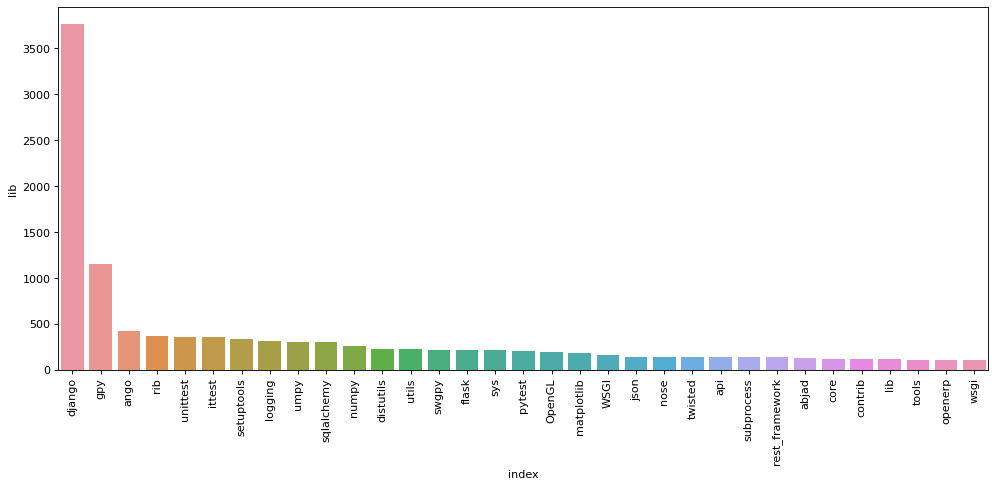

In [106]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(data=top_languages, x='index', y='lib');
plt.xticks(rotation=90);